In [56]:
import cv2

In [76]:
import numpy

In [77]:
!pip install opencv-python

In [78]:
!pip install --user opencv-contrib-python

In [79]:
!pip install imageio-ffmpeg

In [80]:
import imageio

In [81]:
face_cascade = cv2.CascadeClassifier("haarcascade-frontalface-default.xml") 
# cascade filtre serisi, yüz tespiti için

In [82]:
face_cascade

<CascadeClassifier 000001C17DB21150>

In [83]:
 # yüz ve gözü tanımlayacak fonksiyonu tanımlıyorum
eye_cascade = cv2.CascadeClassifier('haarcascade-eye.xml')

In [84]:
eye_cascade

<CascadeClassifier 000001C17DB21470>

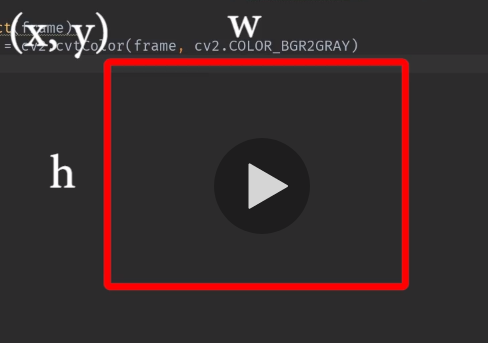

In [100]:
def detect(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # resimleri renklileri siyah beyazları ceviriyoruz
    # buldugu yüzleri faces değişkenıne atadı 
    # faces tuplelardan oluşur
    faces = face_cascade.detectMultiScale(gray,   1.3,  5)  
    
    # resimde yüz araması yapacagım
     
    # 1.3, resmlerimi hangi oranda küçültmeliyim
    
    # 5 , min komşu sayısı                                        
                                         
    
    for (x,y,w,h ) in faces :          # x ,  y koordinatlarım , w genişlik , h ise yüksekliğim
                                             # ilk olarak bu dikdörtgenleri çizmemiz gerekiyor
        cv2.rectangle(frame,(x,y),           # frame,resmimin ilk hali
                        (x+w,y+h),           # dikdörtgenin sol üst ve sağ alt köşeleri
                        (255,0,0),           # rengini 
                                2)           # kalınlıgını belirledim
                                       ### yüz  tespit ve dikdörtgen çizme işlemlerini tamamladım 
                                        ## yüzü tespit ettiğime göre gözü, yüzün içinde arayacağız 
                                        # bunun için 2 tane alan belirlemem gerekiyor  
                                        # bu alan yüz buldugumuz dikdörtgenin içi
                                        # 2 tane belirlememizin sebebi hem siyahbeyaz hem renkli alanda belirlememiz gerekiyor
                                
                                        
        gray_face = gray[y: y+h,x:x+w]    # sb resimde gözü tespit ediyorum , koordinatlarını alıyorum
                                          # y'den başla y +h'e kadar olan değerleri al, x de aynı
        color_face = frame[y: y+h,x:x+w]       
        eyes = eye_cascade.detectMultiScale(gray_face,   1.1,  3)  
        
        # aldığımız koordinata göre orj.resimde bu alana dikdörtgen çizeceğim
        
        for(ex,ey,ew,eh) in eyes :    # bir yüzde  2 tane göz oldugu icin 2 kere dönecek      
            cv2.rectangle(color_face,
                          (ex,ey),      # sol üst köşe
                          (ex+ew,ey+eh),  # sağ alt köşe
                          (0,255,0),       # renk, göz için yeşili seçtim
                          2)                 # kalınlık
                
    return frame        

In [101]:
reader = imageio.get_reader('1.mp4')                # videomu okuttum
fps    = reader.get_meta_data()['fps']                 # fps i aldım 
writer = imageio.get_writer('output.mp4', fps = fps) # input ve outpt aynı olsun diye fps aldım 

In [102]:
#artık yüzü tanıyacak olan döngümü yazacağım 

In [103]:
for i , frame in enumerate(reader):
    frame = detect(frame)
    writer.append_data(frame)
    print(i)
writer.close() 

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27